In [3]:
#!/usr/bin/env python
# coding: utf-8
!pip install jieba

  Stored in directory: C:\Users\Administrator\AppData\Local\pip\Cache\wheels\15\26\ec\e4da0032c1395af9f9377010c510903b3505d7a6c49b832243
Successfully built jieba


In [4]:
from PIL import Image


# In[2]:


import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np
from collections import Counter

In [28]:
text = open('dictionary/news1.txt', "r",encoding="utf-8").read()

In [29]:
jieba.set_dictionary('dictionary/dict.txt.big.txt')
with open('dictionary/stopWord_cloud.txt', 'r', encoding='utf-8-sig') as f: 
    stops = f.read().split('\n')
terms = [] #儲存字詞
for t in jieba.cut(text, cut_all=False): #拆解句⼦為字詞
    if t not in stops: #不是停⽤詞
        terms.append(t)
diction = dict(Counter(terms))
font = 'dictionary/msyh.ttc'

Building prefix dict from C:\Users\Administrator\OmO\dictionary\dict.txt.big.txt ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.ue7a79951e3df8e3395692e251cae1cc2.cache
Loading model cost 1.025 seconds.
Prefix dict has been built successfully.


In [30]:
diction= sorted(diction.items(), key=lambda item:item[1], reverse=True)
diction[1:21]
finaldiction=diction[1:21]
##diction2=dict(Counter(diction))

In [31]:
print(diction)
print('============以上為預設==========')
print(finaldiction)
print('============以上為抓20個==========')
ans2=""
for i in range (0,19):
    ans=("%s': %s, '"% (finaldiction[i][0],finaldiction[i][1]))
    ans2=ans2+ans;
finalans="{'"+ans2+""+str(finaldiction[18][0])+"': "+str(finaldiction[18][1])+"}"
print(finalans)
print('============以上為最終答案==========')
wow2=""
for i in range (0,19):
    for j in range(0,int(finaldiction[i][1])): 
        wow=finaldiction[i][0]
        wow2=wow2+wow
print(str(wow2))
print('============以上為把所有20個最常文字寫出來==========')

[('\n', 56), ('道德', 23), ('理論', 22), ('布倫南', 17), ('誤用', 16), ('小', 11), ('安安', 11), ('認為', 11), ('人', 10), ('反抗', 9), ('警察', 9), ('危險', 9), ('相當', 8), ('一個', 7), ('證據', 7), ('性', 6), ('小華', 6), ('義', 6), ('戰爭', 6), ('憲法', 6), ('接受', 6), ('相信', 6), ('國家', 5), ('政府', 5), ('同樣', 5), ('中', 5), ('知道', 5), ('暗殺', 5), ('法律', 5), ('服從', 5), ('問題', 5), ('有時候', 4), ('欺騙', 4), ('案例', 4), ('殺人', 4), ('成功', 4), ('無辜', 4), ('奴役', 4), ('事實上', 4), ('應該', 4), ('p', 4), ('正義', 4), ('惡', 4), ('需要', 4), ('主張', 3), ('防衛', 3), ('命令', 3), ('準備', 3), ('宣稱', 3), ('說謊', 3), ('結論', 3), ('信念', 3), ('人們', 3), ('『', 3), ('』', 3), ('這是', 3), ('射殺', 3), ('真的', 3), ('看到', 3), ('時', 3), ('執法人員', 2), ('使用', 2), ('人為', 2), ('相同', 2), ('採取', 2), ('攻擊', 2), ('殺害', 2), ('下', 2), ('行為', 2), ('文章', 2), ('惡行', 2), ('看法', 2), ('一些', 2), ('身為', 2), ('狙擊手', 2), ('決定', 2), ('下令', 2), ('阻止', 2), ('民眾', 2), ('總統', 2), ('選民', 2), ('以為', 2), ('兩個', 2), ('一模一樣', 2), ('政治', 2), ('許可', 2), ('設想', 2), ('群人', 2), ('解讀', 2), ('上面', 2), ('意

In [32]:
f = open(r'ans.txt', 'w')
f.write(wow2)
f.close()

In [33]:
text = open('ans.txt', "r").read()

In [34]:
jieba.set_dictionary('dictionary/dict.txt.big.txt')
with open('dictionary/stopWord_cloud.txt', 'r', encoding='utf-8-sig') as f:
    stops = f.read().split('\n')

In [35]:
terms2 = [] #儲存字詞
for t in jieba.cut(text, cut_all=False): #拆解句⼦為字詞
    if t not in stops: #不是停⽤詞
        terms2.append(t)
dictionw2 = Counter(terms2)

Building prefix dict from C:\Users\Administrator\OmO\dictionary\dict.txt.big.txt ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.ue7a79951e3df8e3395692e251cae1cc2.cache
Loading model cost 1.036 seconds.
Prefix dict has been built successfully.


In [36]:
font = 'dictionary/msyh.ttc'

In [37]:
mask = np.array(Image.open("dictionary/heart.png")) #設定⽂字雲形狀
wordcloud = WordCloud(background_color="white",mask=mask,font_path=font)
wordcloud.generate_from_frequencies(frequencies=dictionw2) 

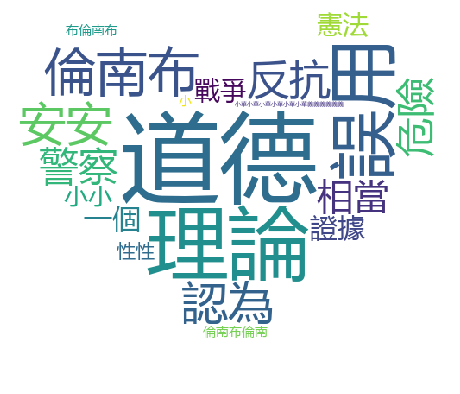

In [38]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [39]:
wordcloud.to_file("news_Wordcloud.png")